# Getting Started

Using Qiskit with Rigetti QPUs and simulators is easy!

To start out, let's import the necessary components:

In [1]:
from qiskit import (
    QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    execute
)
from qiskit_rigetti import RigettiQCSProvider

Now, we'll instantiate a provider and get a backend. Use `provider.get_simulator()` to retrieve a simulator,
or use `provider.get_backend()` to retrieve a remote QPU backend (requires a reservation via [Rigetti Quantum Cloud Services (QCS)](https://docs.rigetti.com/qcs/guides/reserving-time-on-a-qpu)).

In [2]:
provider = RigettiQCSProvider()
backend = provider.get_simulator(num_qubits=2, noisy=True)  # or provider.get_backend(name="Aspen-9")

Now, let's create a simple Bell state circuit:

In [3]:
circuit = QuantumCircuit(QuantumRegister(2, "q"), ClassicalRegister(2, "ro"))
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

circuit.draw()

┌───┐     ┌─┐   
 q_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
 q_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
ro: 2/═══════════╩══╩═
                 0  1

The circuit can now be run against the backend with Qiskit's `execute()` function:

In [4]:
job = execute(circuit, backend, shots=1000)
result = job.result()
counts = result.get_counts()
print("Counts for experiment:", counts)

Counts for experiment: {'01': 57, '11': 405, '00': 476, '10': 62}


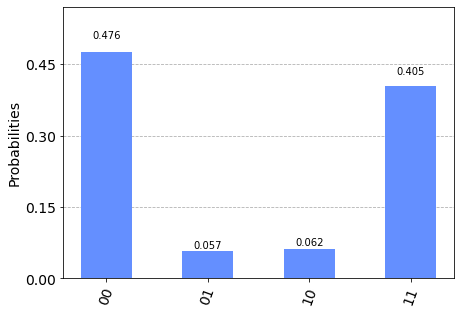

In [5]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(counts)

## Quantum Cloud Services

For more information on using Rigetti Quantum Cloud Services, see the [QCS documentation](https://docs.rigetti.com).